# Relatorio de Analise 7

## Criando Agrupamentos

In [18]:
import pandas as pd

In [19]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [20]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,16.67,Apartamento
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,17.14,Apartamento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,50.36,Apartamento


In [21]:
dados['Valor'].mean()

12952.659715265761

In [22]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [23]:
dados['Bairro'].drop_duplicates()

0           Copacabana
2      Barra da Tijuca
16            Botafogo
21              Tijuca
25              Leblon
27             Ipanema
110           Flamengo
Name: Bairro, dtype: object

In [24]:
grupo_bairro = dados.groupby('Bairro')

In [25]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [26]:
grupo_bairro.groups

{'Barra da Tijuca': [2, 7, 20, 22, 30, 35, 41, 44, 49, 59, 60, 76, 78, 81, 89, 90, 93, 97, 103, 104, 111, 112, 115, 134, 146, 155, 156, 157, 158, 159, 163, 165, 168, 172, 176, 179, 192, 194, 197, 199, 203, 225, 228, 230, 247, 248, 251, 255, 260, 261, 274, 277, 281, 306, 315, 325, 330, 332, 340, 347, 348, 354, 358, 364, 368, 374, 387, 390, 399, 401, 408, 416, 419, 434, 440, 441, 442, 444, 452, 455, 456, 465, 470, 471, 493, 499, 505, 509, 512, 513, 522, 530, 544, 546, 554, 558, 566, 573, 581, 583, ...], 'Botafogo': [16, 17, 32, 66, 83, 116, 124, 125, 164, 182, 191, 201, 204, 238, 293, 297, 334, 360, 376, 424, 458, 469, 490, 507, 545, 548, 622, 623, 652, 670, 740, 744, 781, 785, 811, 849, 884, 895, 910, 948, 979, 1035, 1083, 1101, 1138, 1148, 1159, 1175, 1192, 1239, 1247, 1266, 1292, 1374, 1381, 1389, 1394, 1403, 1492, 1503, 1508, 1556, 1603, 1621, 1643, 1653, 1668, 1689, 1721, 1749, 1786, 1790, 1791, 1818, 1861, 1906, 1913, 1926, 1939, 1963, 2007, 2036, 2063, 2071, 2094, 2119, 2128, 2154

In [27]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 9019.593829923273
Botafogo -> 19517.037900874635
Copacabana -> 4509.83453689168
Flamengo -> 6923.4839901477835
Ipanema -> 10456.517689207345
Leblon -> 11052.345060893098
Tijuca -> 2954.6740250183957


In [28]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,9019.59,3599.17
Botafogo,19517.04,3296.48
Copacabana,4509.83,1211.94
Flamengo,6923.48,1921.29
Ipanema,10456.52,2360.60
Leblon,11052.35,2290.44
Tijuca,2954.67,854.95


In [29]:
# exercicio 
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [30]:

sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatisticas Descritivas

In [31]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6256.0,9019.59,30192.24,100.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1372.0,19517.04,129131.61,299.0,2500.0,4000.0,11000.0,4500000.0
Copacabana,3185.0,4509.83,6413.41,100.0,1900.0,3000.0,4900.0,198000.0
Flamengo,812.0,6923.48,15767.99,200.0,1900.0,3000.0,5325.0,212544.0
Ipanema,2233.0,10456.52,20859.22,100.0,4000.0,7000.0,12000.0,800000.0
Leblon,1478.0,11052.35,20707.09,100.0,4500.0,7000.0,11900.0,430000.0
Tijuca,1359.0,2954.67,7979.73,320.0,1425.0,1800.0,2499.5,230000.0


In [32]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,738197.0
Botafogo,299.0,4500000.0
Copacabana,100.0,198000.0
Flamengo,200.0,212544.0
Ipanema,100.0,800000.0
Leblon,100.0,430000.0
Tijuca,320.0,230000.0


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

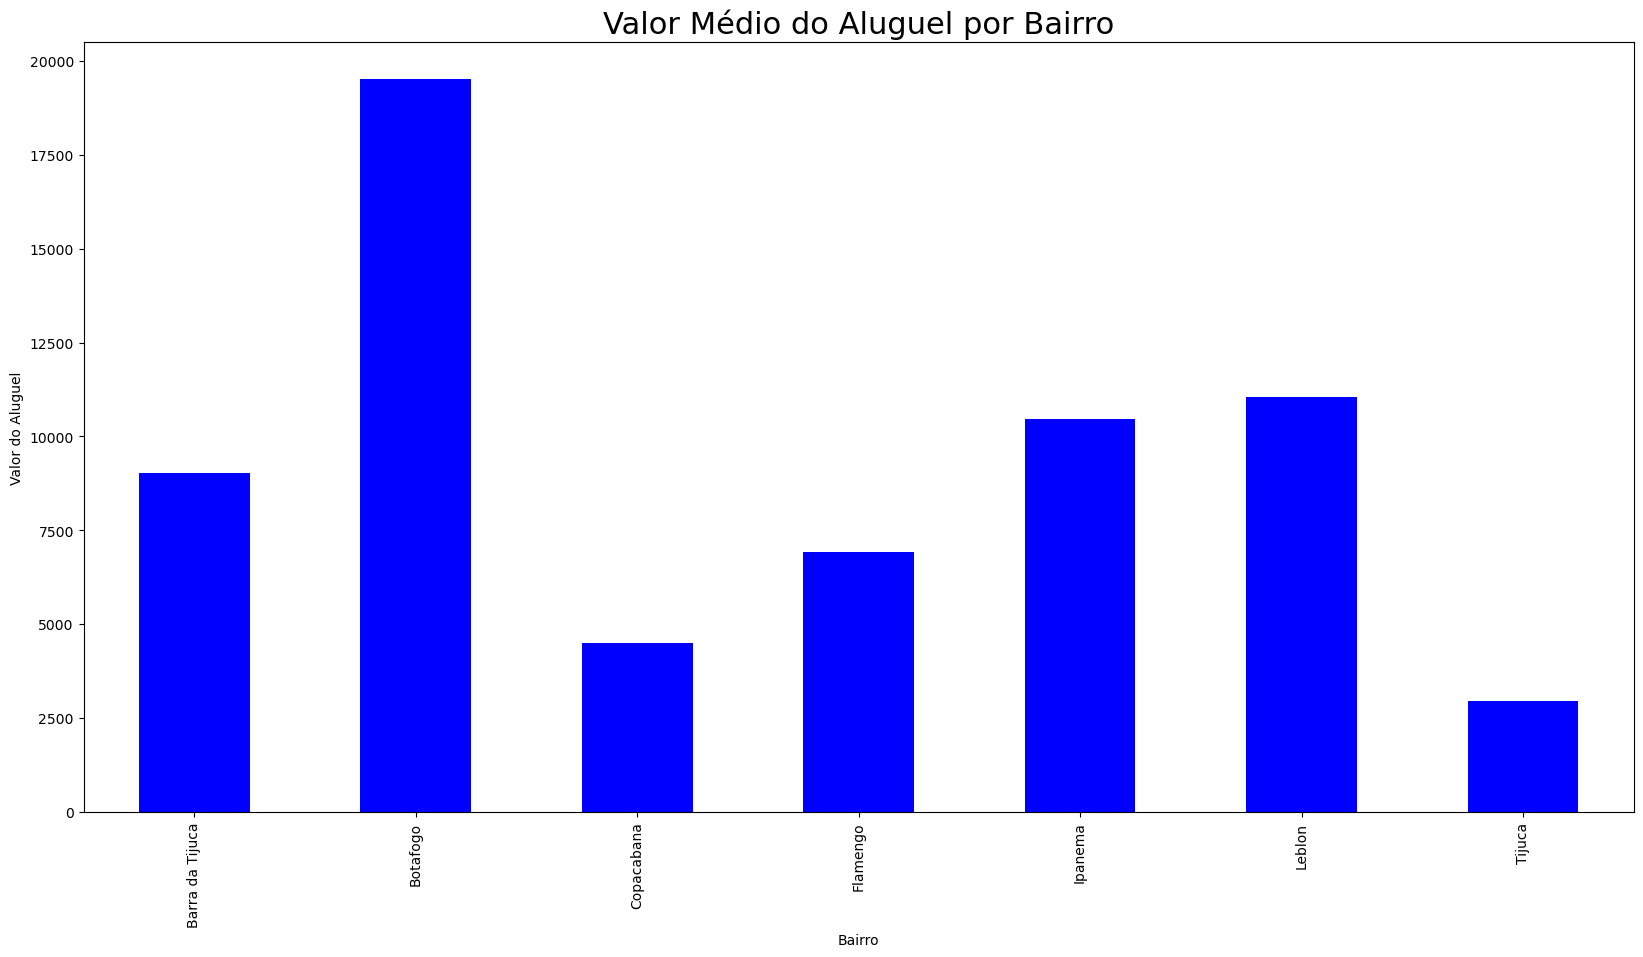

In [34]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})